### This Notebook was built to run Quick EDA on input data on Daily/weekly/Monthly levels to understand the patterns in the data


# Assumptions
- Data is a time-series data. i.e. data has a date column and a target column that varies with date
- Data has atleast 3 months of data in total or for the selected group
- input file is an excel or csv
- All requirements are installed in the env that the notebook is running on (pls use requirements.txt file for install them in env)



## Instructions
User is expected to give the following inputs to the notebook
- **data_path**          - Path to the input data file 
- **date_col_name**      - The column name that holds the date
- **target_col_name**    - The column name that holds the target value
- **target_plot_label**  - This name will be used for labeling the plots
- **group_cols**         -  (True/False) If there is grouping required before Analysing the data
- **grp_by_cols**        -  (if group_cols = True) What column names are to used for group by
- **group**              -  (if group_cols = True) Which group is to be Analyzed

**In : Select the Year (CODE BLOCK)**
- **year**               - Select the year to filter data and Analyze

**In : DATA FILTER (CODE BLOCK)**
- **date_range_start**   -  Used to filter specific period in data - Start date input (expects Same format as date column in input file)
- **date_range_end**     - Used to filter specific period in data - End date input (expects Same format as date column in input file)

**In :  First / Second / Third /Fourth Weekday accross Year (CODE BLOCK)**
- **weekday**            - Which Day of the week is to be Analyzed (Eg: 'Monday')

### Modify code blocks

- This Notebook was built for taking minimum inputs from users. So, the code blocks are parameterized. 

In [4]:
# Run this cell and hit toggle button to hide or unhide the code part

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di 


# print('Run this cell and hit toggle button to hide or unhide the code part')

# # This line will hide code by default when the notebook is exported as HTML
# di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# # This line will add a button to toggle visibility of code blocks, for use with the HTML export version
# di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Loading Data from Local CSV File to perform Analysis on Data Pattern

#### This Notebook helps identify which pipeline(Change value or Seasonality) is better for the metric

In [1]:
## USER INPUTS
# data_path - Path to the input data file
# date_col_name - The column name that holds the date
# target_col_name - The column name that holds the target value
# target_plot_label - This name will be used for labeling the plots


data_path = "C:/Geeta/learning/projects/GPTengineer/anomaly_detection/Datasets/Walmart.csv"
date_col_name = 'Date'
target_col_name = 'Weekly_Sales'

## Below field identifies the plot names
target_plot_label = "Walmart's Weekly Sales Analysis"

## group_cols - is grouping required (true or False)
## grp_by_cols - level at which the data is to be grouped to identify anomalies
## group - This filters the data based on selected values for the columns.

group_cols = True
grp_by_cols = ['region']
group = ('south')

In [2]:
def read(data_path, sheet_name = ''):
    df = pd.DataFrame()
    if data_path.split('.')[-1] == 'xlsx':
        if sheet_name:
            df = pd.read_excel(data_path, sheet_name=sheet_name)
        else:
            df = pd.read_excel(data_path)
        print("Shape of the data in file {} is {}".format(data_path, df.shape))
    else:
        try:
            df = pd.read_csv(data_path)
            print("Shape of the data in file {} is {}".format(data_path, df.shape))
            if df.shape[0] == 0:
                print("No data in file {}".format(data_path))
        except Exception as e:
            print("Issue while reading data at {} \n{}".format(data_path, e))
    return df

In [6]:
# Read data from csv or excel, sheet_name is the sheet in excel that contians data 
df = read(data_path, sheet_name= 'RAW')
df.head(3)

Shape of the data in file C:/Geeta/learning/projects/GPTengineer/anomaly_detection/Datasets/Walmart.csv is (6435, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/10,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/10,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [8]:
df.shape

(6435, 8)

In [9]:
def standardize_date_col(dataframe, date_col):
    dataframe[date_col] = pd.to_datetime(dataframe[date_col], format='%d-%m-%Y', errors='coerce').fillna(pd.to_datetime(df['Date'], format='%d/%m/%y', errors='coerce'))
    # Convert all dates to 'mm-dd-yyyy' format
    dataframe[date_col] = dataframe[date_col].dt.strftime('%Y-%m-%d')
    return dataframe

In [10]:
df = standardize_date_col(df, date_col_name)
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106


In [14]:
# df[date_col_name].agg(['min', 'max']), 
dec = df.describe()

In [15]:
dec

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
## Add reagion column consisting 'east', 'west', 'north' and 'south', with each of the regions containing 11-12 stores.
def add_region():
    # Define a function to map values based on the specified ranges
    def map_value(val):
        if 1 <= val <= 11:
            return 'east'
        elif 11 <= val <= 22:
            return 'west'
        elif 22 <= val <= 33:
            return 'north'
        else:
            return 'south'
    
    # Add a new column 'r' to the DataFrame based on the mapping function
    df['region'] = df['Store'].apply(map_value)
    

In [10]:
add_region()
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,region
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,east
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,east
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,east


In [11]:
df.tail(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,region
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,south
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,south
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667,south


In [12]:
df.region.value_counts(), df.shape

(region
 south    1716
 east     1573
 west     1573
 north    1573
 Name: count, dtype: int64,
 (6435, 9))

In [14]:
df[df['region']=='south'].to_csv("south_data.csv", index=False)


In [13]:
## Aggregating Weekly_Sales as per date col:
# Define a function to find the mode
def mode_func(x):
    return x.mode().iloc[0] if not x.mode().empty else None

In [14]:
## Aggregate the stores
df = df.groupby(['region', date_col_name]).agg({'Weekly_Sales':'sum','Holiday_Flag' : mode_func, 'Temperature':'mean', 'Fuel_Price' : 'mean', 'CPI' : 'mean', 'Unemployment' : 'mean'}).reset_index()
df.region.value_counts(), df.shape

(region
 east     143
 north    143
 south    143
 west     143
 Name: count, dtype: int64,
 (572, 8))

In [15]:
df_filtered = df.copy()

In [16]:
if group_cols:
    groups_df = df_filtered.groupby(grp_by_cols)
    group_df = groups_df.get_group(group)
    group_df = group_df.sort_values(date_col_name)
    group_df.reset_index(drop=True, inplace=True)
    print('Filtered Data for given Group')
    df = group_df.copy()

df.head(2)

Filtered Data for given Group


,region,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,south,2010-02-05,9230159.60,0,37.798333,2.698750,164.710390,9.020833
1,south,2010-02-12,9004756.02,1,37.777500,2.674167,164.801808,9.020833


In [17]:
df.tail(2)

,region,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
141,south,2012-10-19,9090009.14,0,62.634167,3.860750,173.231888,7.199417
142,south,2012-10-26,9077660.87,0,61.792500,3.770833,173.239492,7.199417


In [20]:
df.shape, df.region.sort_values().unique()

((143, 8), array(['south'], dtype=object))

In [21]:
df.describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000
mean,9.126031e+06,0.069930,62.306643,3.338940,168.391238,8.408212
std,8.922584e+05,0.255926,14.657940,0.426890,2.988717,0.542224
min,7.529901e+06,0.000000,32.916667,2.652083,164.489544,7.199417
25%,8.751137e+06,0.000000,49.275000,2.865458,165.295823,7.880167
50%,9.030037e+06,0.000000,62.894167,3.463750,168.249941,8.662167
75%,9.312033e+06,0.000000,76.467083,3.699917,171.426180,8.846667
max,1.439700e+07,1.000000,82.572500,3.985667,173.239492,9.020833


In [22]:
## Date column
df[date_col_name].agg(['min', 'max'])

min    2010-02-05
max    2012-10-26
Name: Date, dtype: object

In [23]:
df.duplicated(subset=['region',date_col_name]).value_counts()

False    143
Name: count, dtype: int64

In [24]:
    
# # Group by columns 'r' and 'date', aggregate column 'a'
# df2 = df.groupby(['region', date_col_name]).agg({'Weekly_Sales':'sum','Holiday_Flag' : mode_func, 'Temperature':'mean', 'Fuel_Price' : 'mean', 'CPI' : 'mean', 'Unemployment' : 'mean'}).reset_index()

# print(df2)

    region        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0    south  2010-02-05    9230159.60             0    37.798333    2.698750   
1    south  2010-02-12    9004756.02             1    37.777500    2.674167   
2    south  2010-02-19    9038451.83             0    40.570000    2.652083   
3    south  2010-02-26    8371391.11             0    41.384167    2.663083   
4    south  2010-03-05    9048710.00             0    45.161667    2.715667   
..     ...         ...           ...           ...          ...         ...   
138  south  2012-09-28    8815211.56             0    70.585833    3.823167   
139  south  2012-10-05    9467004.87             0    68.309167    3.814250   
140  south  2012-10-12    9272120.20             0    61.915833    3.875333   
141  south  2012-10-19    9090009.14             0    62.634167    3.860750   
142  south  2012-10-26    9077660.87             0    61.792500    3.770833   

            CPI  Unemployment  
0    164.710390    

In [25]:
# df.shape, df2.shape

((143, 8), (143, 8))

In [23]:
# df = df2

In [26]:
df.region.value_counts()

region
south    143
Name: count, dtype: int64

In [27]:
## Date imputation
data_ = list(df[target_col_name])
dates = list(df[date_col_name])
data = pd.DataFrame(data_, index=dates, columns = [target_col_name])
data.index = pd.to_datetime(data.index)
data = data.asfreq('W-FRI').interpolate(method='linear') ## interpolate into days, adding missing dates inbetween weeks
data = data.sort_index()

In [28]:
data

,Weekly_Sales
2010-02-05,9230159.60
2010-02-12,9004756.02
2010-02-19,9038451.83
2010-02-26,8371391.11
2010-03-05,9048710.00
...,...
2012-09-28,8815211.56
2012-10-05,9467004.87
2012-10-12,9272120.20
2012-10-19,9090009.14


In [25]:
# ## Date imputation
# data_ = list(df[target_col_name])
# dates = list(df[date_col_name])
# data = pd.DataFrame(data_, index=dates, columns = [target_col_name])
# data.index = pd.to_datetime(data.index)
# data = data.asfreq('D').interpolate(method='linear')
# # data = data.sort_index()
# data.shape

(995, 1)

In [29]:
data, df.shape

(            Weekly_Sales
 2010-02-05    9230159.60
 2010-02-12    9004756.02
 2010-02-19    9038451.83
 2010-02-26    8371391.11
 2010-03-05    9048710.00
 ...                  ...
 2012-09-28    8815211.56
 2012-10-05    9467004.87
 2012-10-12    9272120.20
 2012-10-19    9090009.14
 2012-10-26    9077660.87
 
 [143 rows x 1 columns],
 (143, 8))

## DATA FILTER

In [30]:
date_range_start = '2010-02-05'
date_range_end = '2012-10-26'

data2 = data[(data.index > date_range_start) & (data.index < date_range_end)]
print(data2.head(2))
print( data2.tail(2))

            Weekly_Sales
2010-02-12    9004756.02
2010-02-19    9038451.83
            Weekly_Sales
2012-10-12    9272120.20
2012-10-19    9090009.14


# EDA

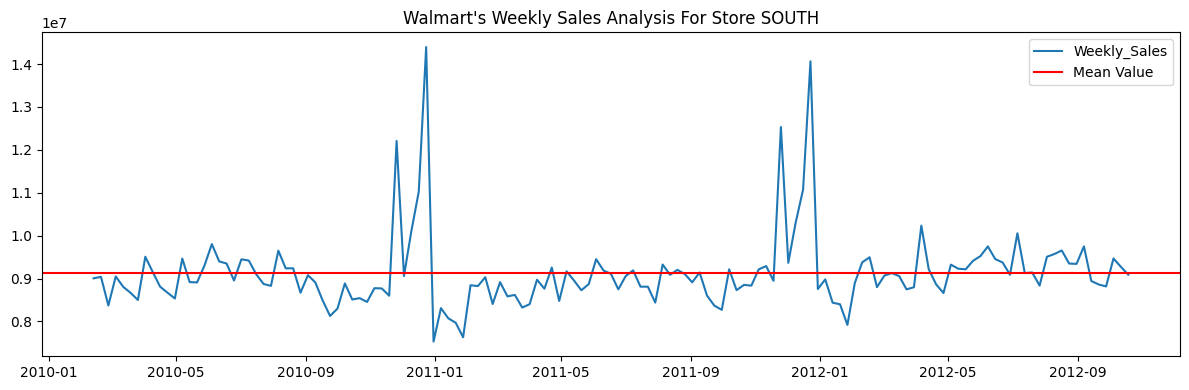

In [34]:
region = 'south'
plt.figure(figsize=(12,4), tight_layout=True)
sns.lineplot(data=data2)
plt.title(target_plot_label + " For Store " + str(region).upper())
plt.axhline(y=np.mean(data2[target_col_name]), color='r', linestyle='-',   label='Mean Value') 
plt.legend(loc="upper right")

In [38]:
df.to_csv("south_data.csv", index=False)


## Select the year to Analyze

In [33]:
year = 2010

## Weekday Analysis

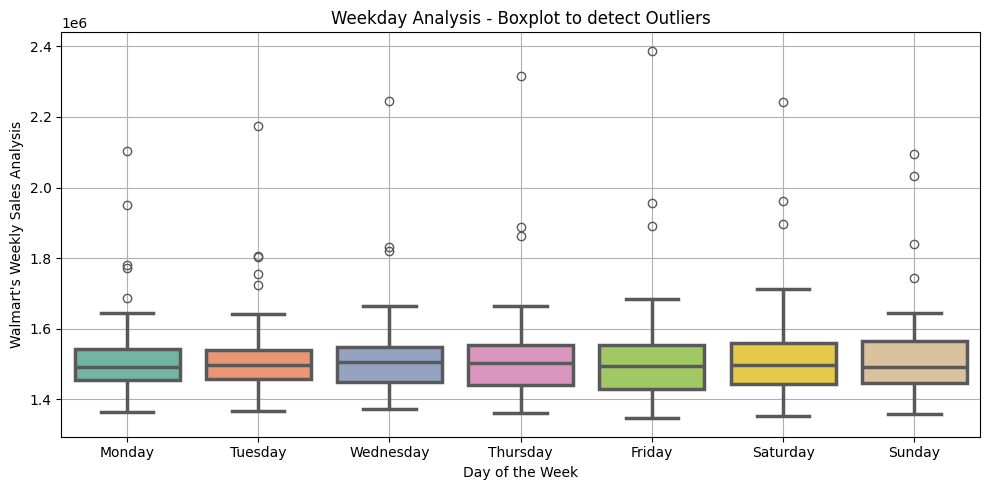

In [23]:
weekday_dict = {'Monday':1,'Tuesday':2,'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
data2_= data.reset_index()
data2_['year'] = data2_['index'].dt.year
data2_['month'] = data2_['index'].dt.strftime('%B')
data2_['weekday'] = data2_['index'].dt.day_name()

data_yr = data2_[data2_['year']==year]

data_yr.sort_values('weekday', key = lambda x : x.apply (lambda x : weekday_dict[x]) , inplace=True)

plt.figure(figsize=(10,5), tight_layout=True)
ax = sns.boxplot(data=data_yr, x='weekday', y=target_col_name, palette='Set2', linewidth=2.5)
ax.set(title='Weekday Analysis - Boxplot to detect Outliers', xlabel='Day of the Week', ylabel= target_plot_label)

plt.grid()
plt.show()

In [24]:
print('Start date in Selected yr : ' , data_yr['index'].min())
print('End date in Selected yr : ' ,data_yr['index'].max())

Start date in Selected yr :  2010-02-05 00:00:00
End date in Selected yr :  2010-12-31 00:00:00


### Weekday Indepth Analysis

In [25]:
data_yr['wn'] = data_yr['index'].dt.isocalendar().week
data_yr.head(2)

,index,Weekly_Sales,year,month,weekday,wn
164,2010-07-19,1.421564e+06,2010,July,Monday,29
108,2010-05-24,1.413551e+06,2010,May,Monday,21


In [25]:
data_yr_p = data_yr.groupby(['weekday', 'wn'], as_index=False)[target_col_name].mean()
data_yr_p[target_col_name] = data_yr_p[target_col_name].astype(float)
data_yr_p.sort_values('wn', inplace=True)
data_yr_p = data_yr_p.pivot(index='weekday', columns='wn' ,values=target_col_name).T
data_yr_p.reset_index(inplace=True)
data_yr_p = data_yr_p.set_index('wn')

In [29]:
import plotly.graph_objects as go
import pandas as pd

# Initialize figure
fig = go.Figure()

# Add Traces
fig.add_trace(
    go.Scatter(x=list(data_yr_p.index),
               y=list(data_yr_p.Monday),
               name="Mon",
               line=dict(color="#F22727")))

fig.add_trace(
    go.Scatter(x=list(data_yr_p.index),
               y=[data_yr_p.Monday.mean()] * len(data_yr_p.index),
               name="Mon Average",
               visible=False,
               line=dict(color="#F22727", dash="dash")))

fig.add_trace(
    go.Scatter(x=list(data_yr_p.index),
               y=list(data_yr_p.Tuesday),
               name="Tue",
               line=dict(color="#CACF33")))

fig.add_trace(
    go.Scatter(x=list(data_yr_p.index),
               y=[data_yr_p.Tuesday.mean()] * len(data_yr_p.index),
               name="Tue Average",
               visible=False,
               line=dict(color="#CACF33", dash="dash")))

fig.add_trace(
    go.Scatter(x=list(data_yr_p.index),
               y=list(data_yr_p.Wednesday),
               name="Wed",
               line=dict(color="#33CFA5")))

fig.add_trace(
    go.Scatter(x=list(data_yr_p.index),
               y=[data_yr_p.Wednesday.mean()] * len(data_yr_p.index),
               name="Wed Average",
               visible=False,
               line=dict(color="#33CFA5", dash="dash")))

fig.add_trace(
    go.Scatter(x=list(data_yr_p.index),
               y=list(data_yr_p.Thursday),
               name="Thu",
               line=dict(color="#27E4F2")))

fig.add_trace(
    go.Scatter(x=list(data_yr_p.index),
               y=[data_yr_p.Thursday.mean()] * len(data_yr_p.index),
               name="Thu Average",
               visible=False,
               line=dict(color="#27E4F2", dash="dash")))

fig.add_trace(
    go.Scatter(x=list(data_yr_p.index),
               y=list(data_yr_p.Friday),
               name="Fri",
               line=dict(color="#9ECF33")))

fig.add_trace(
    go.Scatter(x=list(data_yr_p.index),
               y=[data_yr_p.Friday.mean()] * len(data_yr_p.index),
               name="Fri Average",
               visible=False,
               line=dict(color="#9ECF33", dash="dash")))


fig.add_trace(
    go.Scatter(x=list(data_yr_p.index),
               y=list(data_yr_p.Saturday),
               name="Sat",
               line=dict(color="#CCCF33")))

fig.add_trace(
    go.Scatter(x=list(data_yr_p.index),
               y=[data_yr_p.Saturday.mean()] * len(data_yr_p.index),
               name="Sat Average",
               visible=False,
               line=dict(color="#CCCF33", dash="dash")))


fig.add_trace(
    go.Scatter(x=list(data_yr_p.index),
               y=list(data_yr_p.Sunday),
               name="Sun",
               line=dict(color="#CF9833")))

fig.add_trace(
    go.Scatter(x=list(data_yr_p.index),
               y=[data_yr_p.Sunday.mean()] * len(data_yr_p.index),
               name="Sun Average",
               visible=False,
               line=dict(color="#CF9833", dash="dash")))


Mon_annotations = [dict(x=26,
                         y=data_yr_p.Monday.mean(),
                         xref="x", yref="y",
                         text="Mon Average:<br> %.3f" % data_yr_p.Monday.mean(),
                         ax=0, ay=-40),
                    dict(x=data_yr_p.Monday.idxmax(),
                         y=data_yr_p.Monday.max(),
                         xref="x", yref="y",
                         text="Mon Max:<br> %.3f" % data_yr_p.Monday.max(),
                         ax=-40, ay=-40),
                   dict(x=data_yr_p.Monday.idxmin(),
                        y=data_yr_p.Monday.min(),
                        xref="x", yref="y",
                        text="Mon Min:<br> %.3f" % data_yr_p.Monday.min(),
                        ax=0, ay=40)]

Tue_annotations = [dict(x=26,
                         y=data_yr_p.Tuesday.mean(),
                         xref="x", yref="y",
                         text="Tue Average:<br> %.3f" % data_yr_p.Tuesday.mean(),
                         ax=0, ay=-40),
                    dict(x=data_yr_p.Tuesday.idxmax(),
                         y=data_yr_p.Tuesday.max(),
                         xref="x", yref="y",
                         text="Tue Max:<br> %.3f" % data_yr_p.Tuesday.max(),
                         ax=-40, ay=-40),
                   dict(x=data_yr_p.Tuesday.idxmin(),
                        y=data_yr_p.Tuesday.min(),
                        xref="x", yref="y",
                        text="Tue Min:<br> %.3f" % data_yr_p.Tuesday.min(),
                        ax=0, ay=40)]


Wed_annotations = [dict(x=26,
                         y=data_yr_p.Wednesday.mean(),
                         xref="x", yref="y",
                         text="Wed Average:<br> %.3f" % data_yr_p.Wednesday.mean(),
                         ax=0, ay=-40),
                    dict(x=data_yr_p.Wednesday.idxmax(),
                         y=data_yr_p.Wednesday.max(),
                         xref="x", yref="y",
                         text="Wed Max:<br> %.3f" % data_yr_p.Wednesday.max(),
                         ax=-40, ay=-40),
                   dict(x=data_yr_p.Wednesday.idxmin(),
                        y=data_yr_p.Wednesday.min(),
                        xref="x", yref="y",
                        text="Fri Min:<br> %.3f" % data_yr_p.Wednesday.min(),
                        ax=0, ay=40)]


Thu_annotations = [dict(x=26,
                         y=data_yr_p.Thursday.mean(),
                         xref="x", yref="y",
                         text="Thu Average:<br> %.3f" % data_yr_p.Thursday.mean(),
                         ax=0, ay=-40),
                    dict(x=data_yr_p.Thursday.idxmax(),
                         y=data_yr_p.Thursday.max(),
                         xref="x", yref="y",
                         text="Thu Max:<br> %.3f" % data_yr_p.Thursday.max(),
                         ax=-40, ay=-40),
                   dict(x=data_yr_p.Thursday.idxmin(),
                        y=data_yr_p.Thursday.min(),
                        xref="x", yref="y",
                        text="Fri Min:<br> %.3f" % data_yr_p.Thursday.min(),
                        ax=0, ay=40)]

Fri_annotations = [dict(x=26,
                         y=data_yr_p.Friday.mean(),
                         xref="x", yref="y",
                         text="Fri Average:<br> %.3f" % data_yr_p.Friday.mean(),
                         ax=0, ay=-40),
                    dict(x=data_yr_p.Friday.idxmax(),
                         y=data_yr_p.Friday.max(),
                         xref="x", yref="y",
                         text="Fri Max:<br> %.3f" % data_yr_p.Friday.max(),
                         ax=-40, ay=-40),
                   dict(x=data_yr_p.Friday.idxmin(),
                        y=data_yr_p.Friday.min(),
                        xref="x", yref="y",
                        text="Fri Min:<br> %.3f" % data_yr_p.Friday.min(),
                        ax=0, ay=40)]


Sat_annotations = [dict(x=26,
                         y=data_yr_p.Saturday.mean(),
                         xref="x", yref="y",
                         text="Sat Average:<br> %.3f" % data_yr_p.Saturday.mean(),
                         ax=0, ay=-40),
                    dict(x=data_yr_p.Saturday.idxmax(),
                         y=data_yr_p.Saturday.max(),
                         xref="x", yref="y",
                         text="Sat Max:<br> %.3f" % data_yr_p.Saturday.max(),
                         ax=-40, ay=-40),
                   dict(x=data_yr_p.Saturday.idxmin(),
                        y=data_yr_p.Saturday.min(),
                        xref="x", yref="y",
                        text="Sat Min:<br> %.3f" % data_yr_p.Saturday.min(),
                        ax=0, ay=40)]

Sun_annotations = [dict(x=26,
                        y=data_yr_p.Sunday.mean(),
                        xref="x", yref="y",
                        text="Sun Average:<br> %.3f" % data_yr_p.Sunday.mean(),
                        ax=0, ay=40),
                   dict(x=data_yr_p.Sunday.idxmax(),
                        y=data_yr_p.Sunday.max(),
                        xref="x", yref="y",
                        text="Sun Max:<br> %.3f" % data_yr_p.Sunday.max(),
                        ax=0, ay=40),
                   dict(x=data_yr_p.Sunday.idxmin(),
                        y=data_yr_p.Sunday.min(),
                        xref="x", yref="y",
                        text="Sun Min:<br> %.3f" % data_yr_p.Sunday.min(),
                        ax=0, ay=40)
                  ]

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="ALL",
                     method="update",
                     args=[{"visible": [True, False, True, False, True, False, True, False, True, False, True, False, True, False]},
                           {"title": "ALL",
                            "annotations": []}]),
                dict(label="Mon",
                     method="update",
                     args=[{"visible": [True, True, False, False, False, False, False, False, False, False, False, False, False, False]},
                           {"title": "Monday",
                            "annotations": Mon_annotations}]),
                dict(label="Tue",
                     method="update",
                     args=[{"visible": [False, False, True, True, False, False, False, False, False, False, False, False, False, False]},
                           {"title": "Tuesday",
                            "annotations": Tue_annotations}]),
                dict(label="Wed",
                     method="update",
                     args=[{"visible": [False, False, False, False, True, True, False, False, False, False, False, False, False, False]},
                           {"title": "Wednesday",
                            "annotations": Wed_annotations}]),
                dict(label="Thu",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, True, True, False, False, False, False, False, False]},
                           {"title": "Thursday",
                            "annotations": Thu_annotations}]),
                dict(label="Fri",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, False, False, True, True, False, False, False, False]},
                           {"title": "Friday",
                            "annotations": Fri_annotations}]),
                
                dict(label="Sat",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, False, False, False, False, True, True, False, False]},
                           {"title": "Saturday",
                            "annotations": Sat_annotations}]),
                
                dict(label="Sun",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, False, False, False, False, False, False, True, True]},
                           {"title": "Sunday",
                            "annotations": Sun_annotations}]),
            ]),
        )
    ])

# Set title
fig.update_layout(title_text="Daywise Pattern Across the Year - Week Number on X-axis & Value on Y-axis")

fig.show()
print('This is a Dynamic plot. Will be visible only after execution of this cell')

This is a Dynamic plot. Will be visible only after execution of this cell


### First / Second / Third /Fourth Weekday accross Year

In [55]:
## Weekday input here

weekday = 'Monday'


month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, \
              'September':9, 'October':10, 'November':11, 'December':12}


data_yr_weekday = data_yr[(data_yr['weekday'] == weekday)]
data_yr_weekday.sort_values('index', inplace=True)
data_yr_weekday['WeekdayinMonth'] = 0
for month in month_dict:
    weeks = len(data_yr_weekday[data_yr_weekday.month == month]['WeekdayinMonth'])
    data_yr_weekday.loc[data_yr_weekday.month == month, 'WeekdayinMonth'] = [weekday + str(i) for i in range(1,weeks+1)]

In [32]:
data_yr.month.value_counts()

August       31
December     31
October      31
September    30
November     30
July          6
Name: month, dtype: int64

                                         First / Second / Third /Fourth Weekday accross Months


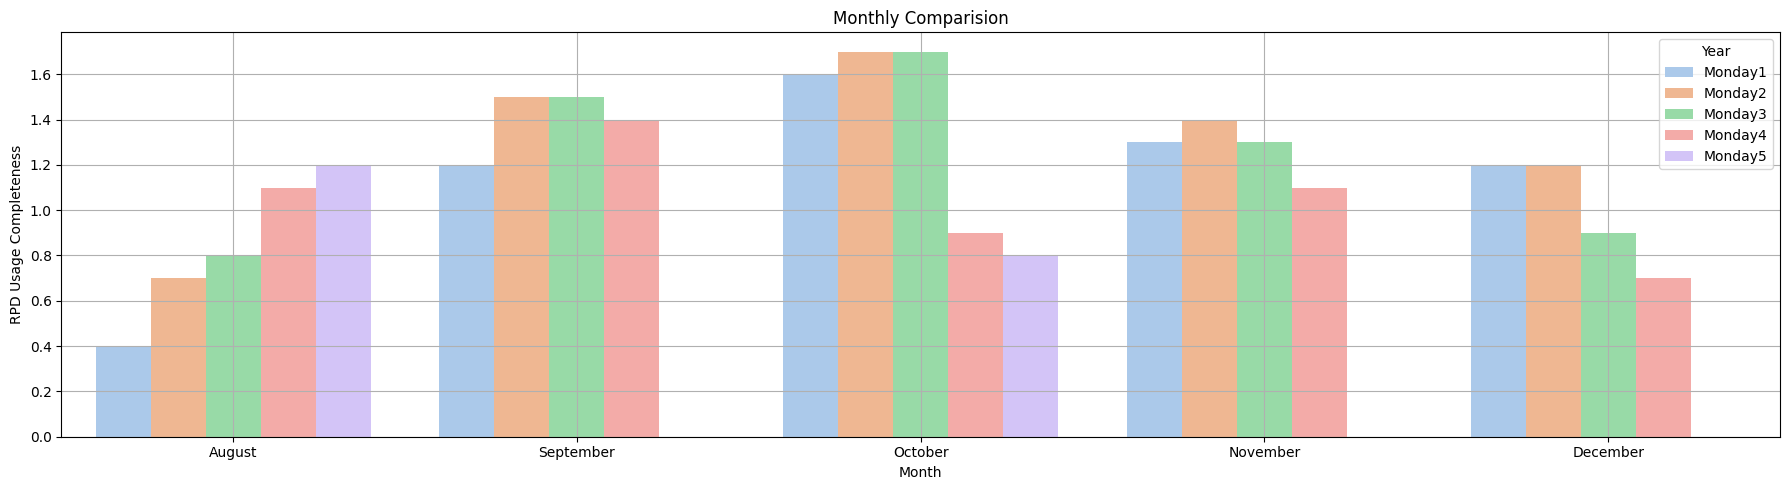

In [35]:
print('                                         First / Second / Third /Fourth Weekday accross Months')

plt.figure(figsize=(18, 5), tight_layout=True)
ax = sns.barplot(x=data_yr_weekday['month'], y=data_yr_weekday[target_col_name], \
                 hue=data_yr_weekday['WeekdayinMonth'], palette='pastel')

ax.set(title='Monthly Comparision' ,xlabel='Month', ylabel=target_plot_label)
ax.legend(title='Year', title_fontsize='10', loc='upper right')
plt.grid()
plt.show()

## A Closer look at - Last 30 Days  

In [37]:
last_30_data = data2[-30:]
last_30_data.head(2)

,rpd_fe_completeness
2023-01-02,0.7
2023-01-03,0.7


Monday to Monday Patterns


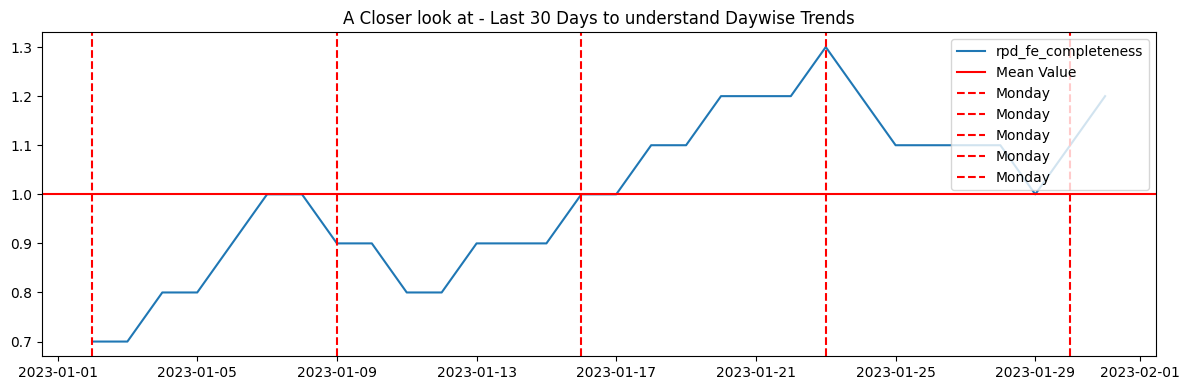

In [40]:
plt.figure(figsize=(12,4), tight_layout=True)
print('Monday to Monday Patterns')
sns.lineplot(data=last_30_data)
plt.axhline(y=np.mean(last_30_data[target_col_name]), color='r', linestyle='-', label = 'Mean Value')
sunday_df= last_30_data[last_30_data.index.dayofweek == 0]

for date in sunday_df.index:
    plt.axvline(x =date, ls='--', c='red', label = 'Monday')

plt.title("A Closer look at - Last 30 Days to understand Daywise Trends")
plt.legend(loc="upper right")

## Weekly Patterns

In [41]:
data3= data.reset_index()
data3['year'] = data3['index'].dt.year
data3['month'] = data3['index'].dt.strftime('%B')
data3['wn'] = data3['index'].dt.isocalendar().week
data3.head(3)

,index,rpd_fe_completeness,year,month,wn
0,2022-07-26,0.5,2022,July,30
1,2022-07-27,0.5,2022,July,30
2,2022-07-28,0.5,2022,July,30


In [42]:
last_few_months = []
for mn in zip(data3['year'][-90:].values[::-1], data3['month'][-90:].values[::-1]):
    if mn not in last_few_months:
        last_few_months.append(mn)
        
last_few_months    

[(2023, 'February'), (2023, 'January'), (2022, 'December'), (2022, 'November')]

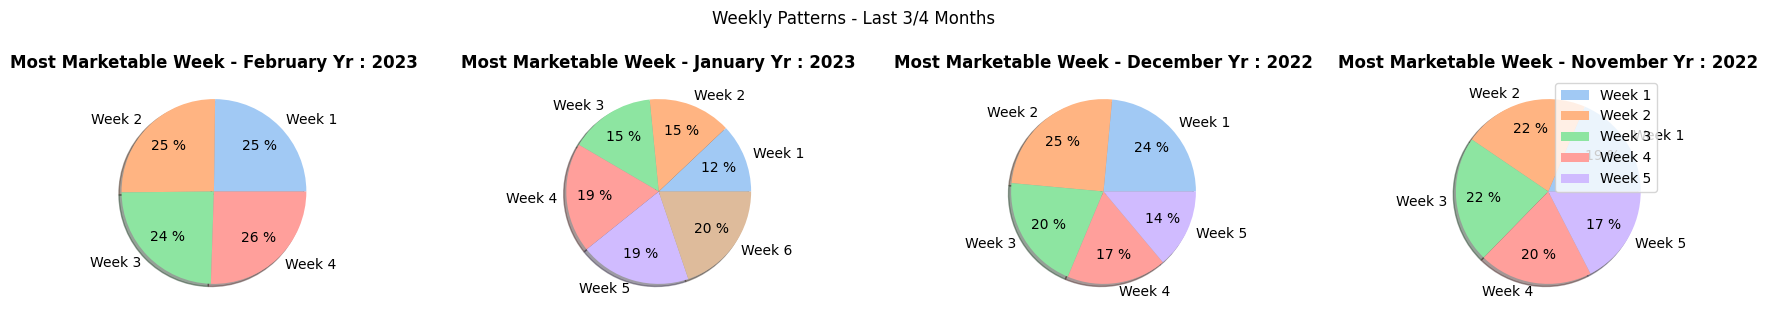

In [48]:
fig, axes = plt.subplots(ncols=len(last_few_months), nrows=1, figsize=(22,3))

for i, ax in zip(last_few_months, axes.flat):
    year = i[0]
    month = i[1]
    colors = sns.color_palette('pastel')
    test_pie = data3[(data3['month'] == month) & (data3['year'] == year)].resample('W', on='index')[target_col_name].mean()
    test_pie = test_pie.reset_index()
    test_pie[target_col_name] = test_pie[target_col_name].astype(float)
    test_pie['index'] = test_pie['index'].dt.date
    test_pie = test_pie.sort_values('index', ascending=True)
    test_pie['Week of Month'] = ['Week ' + str(i+1) for i in range(len(test_pie))] 
    test_pie.sort_values(by='index', inplace = True) 
    test_pie
    
    ax.pie(test_pie[target_col_name], labels=test_pie['Week of Month'], autopct='%.0f %%', pctdistance=.7,
          colors=colors, shadow=True)
    ax.set_title('Most Marketable Week - ' + month +' Yr : ' + str(year), weight='bold')
    
    
fig.suptitle("Weekly Patterns - Last 3/4 Months", y= 1.1)
plt.legend(loc="upper right")
plt.show()

## Monthly Patterns

In [48]:
data_yr

,index,rpd_fe_completeness,year,month,weekday,wn
55,2022-09-19,1.5,2022,September,Monday,38
118,2022-11-21,1.3,2022,November,Monday,47
41,2022-09-05,1.2,2022,September,Monday,36
27,2022-08-22,1.1,2022,August,Monday,34
132,2022-12-05,1.2,2022,December,Monday,49
...,...,...,...,...,...,...
138,2022-12-11,1.2,2022,December,Sunday,49
103,2022-11-06,1.3,2022,November,Sunday,44
54,2022-09-18,1.5,2022,September,Sunday,37
110,2022-11-13,1.4,2022,November,Sunday,45


Year : 2022   ||  Monthly average across the year


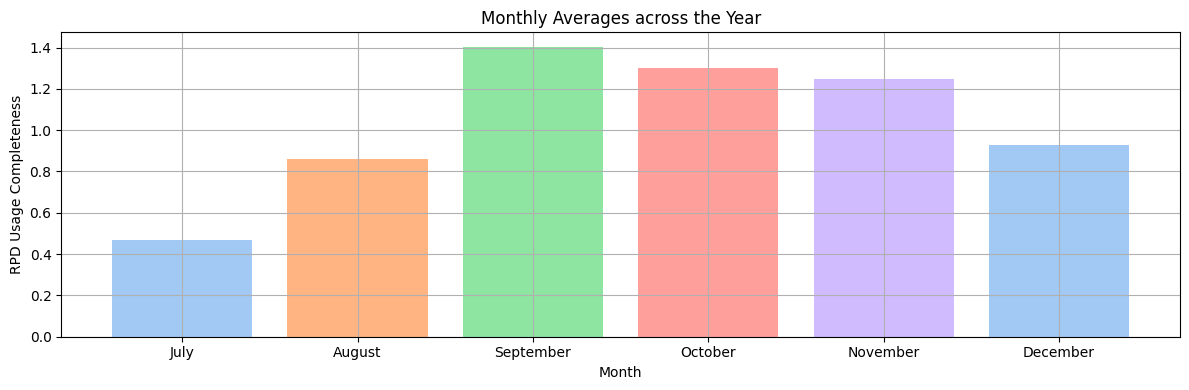

In [51]:
mav_yr = data_yr.groupby(data_yr['index'].dt.strftime('%B'))[target_col_name].mean().astype(float).sort_values()
mav_yr = pd.DataFrame(mav_yr).reset_index()

mav_yr.sort_values('index', key = lambda x : x.apply (lambda x : month_dict[x]) , inplace=True)
print('Year : ' + str(year) + '   ||  Monthly average across the year')

plt.figure(figsize=(12,4), tight_layout=True)
colors = sns.color_palette('pastel')
plt.bar(mav_yr['index'], mav_yr[target_col_name], color=colors[:5])
plt.xlabel('Month')
plt.ylabel(target_plot_label)
plt.title('Monthly Averages across the Year')
plt.grid()
plt.show()

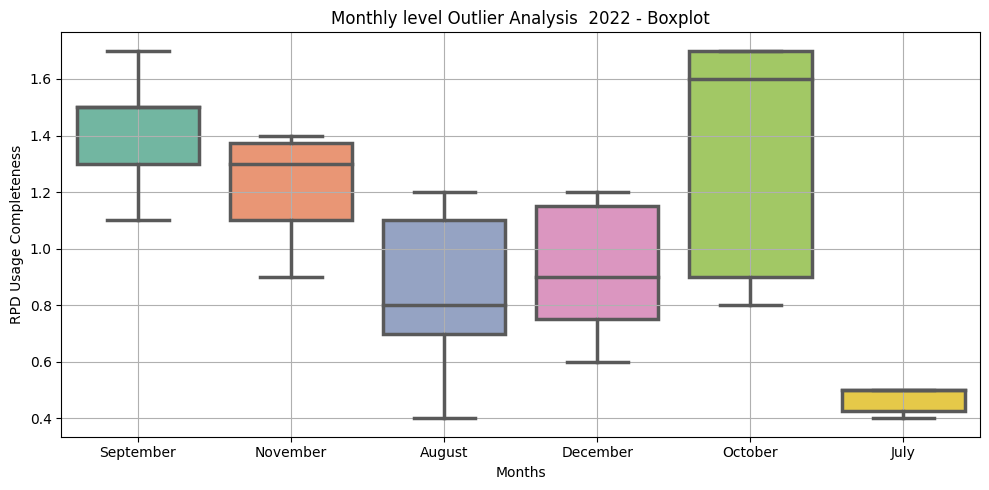

In [50]:
plt.figure(figsize=(10,5), tight_layout=True)
ax = sns.boxplot(data=data_yr, x='month', y=target_col_name, palette='Set2', linewidth=2.5)
ax.set(title='Monthly level Outlier Analysis  ' + str(year) + ' - Boxplot', xlabel='Months', ylabel=target_plot_label)
plt.grid()
plt.show()

## STL - TRENDS IN LAST 3 Months Data

In [49]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from mpl_toolkits.mplot3d import Axes3D

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

In [50]:
data_last_3_months = data[-90:]
data_last_3_months.head()

,Count(*)
2022-10-22,97712.0
2022-10-23,61152.0
2022-10-24,35517.0
2022-10-25,75332.0
2022-10-26,90694.0


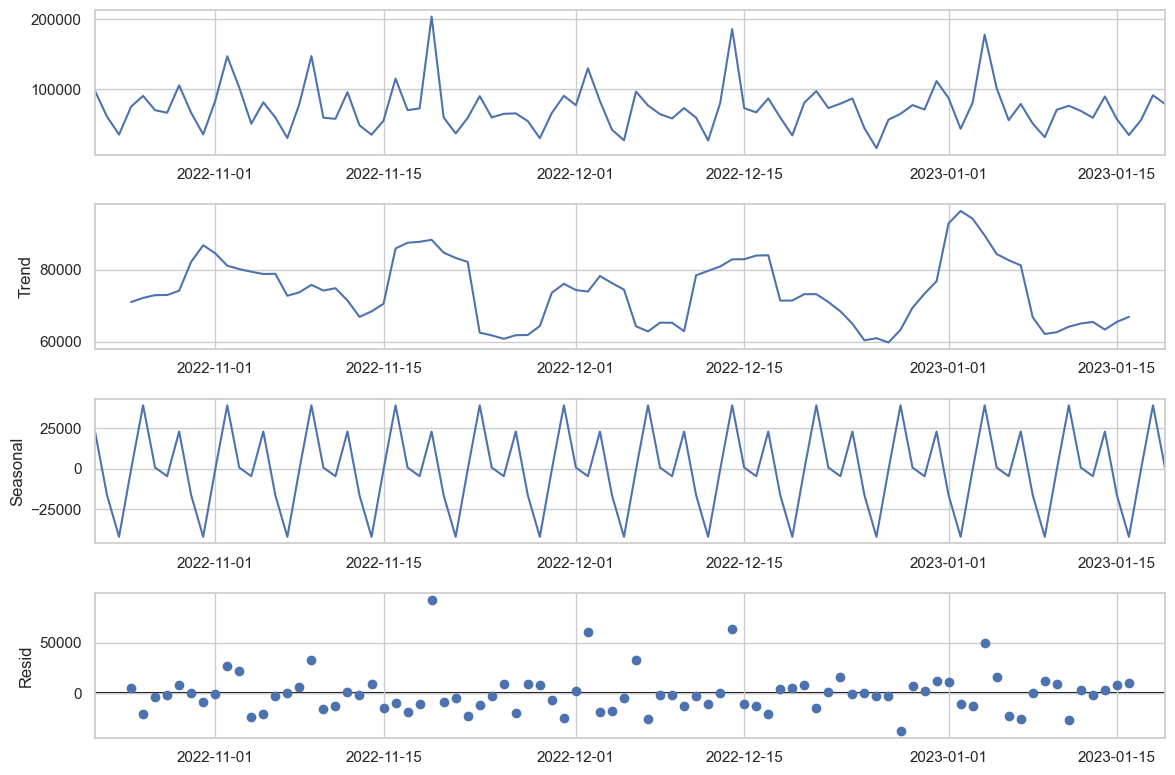

In [51]:
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=15)

result = seasonal_decompose(data_last_3_months, model='additive')
fig = result.plot()